In [345]:
# code reference: https://github.com/jatinmandav/Neural-Networks/blob/master/Sentiment-Analysis/fastText/sentiment_analysis_fastext.ipynb
# import libraries
import gensim
from gensim.models import FastText
import pandas as pd
import time
import numpy as np
import keras.backend as K
from sklearn.utils.class_weight import compute_class_weight
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional
from tensorflow import keras
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [346]:
# import dataset
df_train =pd.read_csv('/users/macbookpro/processed_train.csv')
df_test =pd.read_csv('/users/macbookpro/processed_test.csv')
df_train.shape

(1000, 15)

In [347]:
df_train['sentiment'].value_counts()

 1    498
 0    412
-1     90
Name: sentiment, dtype: int64

In [348]:
df_test['sentiment'].value_counts()

 0    304
 1    181
-1     15
Name: sentiment, dtype: int64

In [349]:
df_train.head()

,sentiment,username,verified,followersCount,content,date,country,replyCount,retweetCount,likeCount,url,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,1,wintersgordon,False,342,Still trying to master that contour? A mistake...,2022-08-26 11:35:12+00:00,Argentina,0,0,0,https://twitter.com/wintersgordon/status/15631...,"['contour', 'contouringmakeup', 'countouring',...",still try to master that contour a mistake tha...,still try to master that contour a mistake tha...,still try to master that contour a mistake tha...
1,0,TheTressXpress,False,74,Our first Pop Up of 2022 🥳👏🏽\nJoin us from 10a...,2022-07-27 14:24:19+00:00,Papua New Guinea,0,3,2,https://twitter.com/TheTressXpress/status/1552...,"['popup', 'business', 'hairproducts', 'summer']",our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...
2,1,Style_Sage,False,967,"Our June Beauty Report is live, and here are s...",2022-06-15 17:50:48+00:00,Argentina,0,0,0,https://twitter.com/Style_Sage/status/15371305...,"['beauty', 'beautytrends', 'makeup']",our june beauty report be live and here be som...,our june beauty report be live and here be som...,our june beauty report be live and here be som...
3,0,BeautyLashed,False,2,📷 Definitely not shy 🤩 @keiana.mua absolutely ...,2022-07-30 14:44:50+00:00,Argentina,0,0,0,https://twitter.com/BeautyLashed/status/155339...,"['makeuptransformation', 'makeuptutorial', 'ma...",camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...
4,1,tecyl1971,False,41,The Sonya™ daily skincare system delivers aloe...,2022-07-06 20:02:51+00:00,Argentina,0,0,1,https://twitter.com/tecyl1971/status/154477389...,"['foreverskincare', 'dailyskincare', 'tecylalo...",the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...


In [350]:
df_test.shape

(500, 15)

In [351]:
df_test['sentiment'].value_counts()

 0    304
 1    181
-1     15
Name: sentiment, dtype: int64

In [352]:
df_test.head()

,sentiment,username,verified,followersCount,content,date,country,replyCount,retweetCount,likeCount,url,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,0,TryNotImages,False,180,"""Summer Summer Summertime. Time to sit back an...",2022-07-03 01:33:25+00:00,Mexico,0,0,0,https://twitter.com/TryNotImages/status/154340...,"['TryNotImages', 'beauty', 'sunset', 'winstons...",summer summer summertime time to sit back and ...,summer summer summertime time to sit back and ...,summer summer summertime time to sit back and ...
1,1,arar_group,False,33,"When your hair is in good shape, it undoubtedl...",2022-08-23 04:59:34+00:00,Argentina,0,0,0,https://twitter.com/arar_group/status/15619411...,"['ArarGroup', 'ArarServices', 'ArarInnovation'...",when your hair be in good shape it undoubtedly...,when your hair be in good shape it undoubtedly...,when your hair be in good shape it undoubtedly...
2,0,HBincharge,False,3933,Walk you like a dog… #makeuptransformation #ma...,2022-07-29 06:29:21+00:00,Argentina,0,0,0,https://twitter.com/HBincharge/status/15529040...,"['makeuptransformation', 'makeuptrends', 'make...",walk you like a dog via,walk you like a dog via,walk you like a dog via
3,1,CathWarburton,False,44,"It's pay day, so go on and treat yourself – yo...",2022-08-30 18:12:13+00:00,Argentina,0,0,0,https://twitter.com/CathWarburton/status/15646...,"['Avon', 'Beauty', 'AvonBeauty', 'MakeUp', 'Av...",it be pay day so go on and treat yourself you ...,it be pay day so go on and treat yourself you ...,it be pay day so go on and treat yourself you ...
4,1,MAHJAHAJH,False,22,Here are some tips of what skincare range migh...,2022-08-30 11:40:18+00:00,Argentina,0,0,0,https://twitter.com/MAHJAHAJH/status/156457875...,"['SkincareTips', 'Moisturise']",here be some tip of what sincere range might w...,here be some tip of what sincere range might w...,here be some tip of what sincere range might w...


In [353]:
df1=pd.DataFrame(df_train['processed'])
df1['sentiment']= df_train['sentiment']
df2=pd.DataFrame(df_test['processed'])
df2['sentiment']= df_test['sentiment']
df3 = df1.append(df2)
df3.head()

/var/folders/2f/dgxn4rw16799s4c8wtdgqpg80000gn/T/ipykernel_34543/4135013109.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


,processed,sentiment
0,still try to master that contour a mistake tha...,1
1,our first pop up of 2022 partying_face clippin...,0
2,our june beauty report be live and here be som...,1
3,camera definitely not shy star strike absolute...,0
4,the sony trade_mark daily sincere system deliv...,1


In [354]:
# declaring constants
vector_size = 100
window = 5

In [355]:
# trianing fats text model
fasttext_model = '/users/macbookpro/twitter-sentiment-fasttext-52.model/saved_model.pb'

print('Generating FastText Vectors ..')

start = time.time()

model = FastText()
model.build_vocab(df3['processed'])
model.train(df3['processed'],
            total_examples=model.corpus_count, epochs=model.epochs)

print('FastText Created in {} seconds.'.format(time.time() - start))

model.save(fasttext_model)
print('FastText Model saved at {}'.format(fasttext_model))

del model

Generating FastText Vectors ..
FastText Created in 1.2365269660949707 seconds.
FastText Model saved at /users/macbookpro/twitter-sentiment-fasttext-52.model/saved_model.pb


In [356]:
# load trained model
model = FastText.load(fasttext_model)

In [357]:
# extract word vectors
x_vectors = model.wv
del model

In [358]:
x_vectors


In [359]:
len(df3['sentiment']), len(df3['processed'])


(1500, 1500)

In [360]:
# train test split
train_size = int((len(df_train['processed'])))
test_size = int((len(df_test['processed'])))

max_no_tokens = 100

indexes = set(range(0,train_size + test_size))

x_train = np.zeros((train_size, max_no_tokens, vector_size), dtype=K.floatx())
y_train = np.zeros((train_size, 3), dtype=np.int32)

x_test = np.zeros((test_size, max_no_tokens, vector_size), dtype=K.floatx())
y_test = np.zeros((test_size, 3), dtype=np.int32)

In [361]:
train_size, test_size


(1000, 500)

In [362]:
tweets = list(df3['processed'])
labels = list(df3['sentiment'])

In [363]:
len(labels), len(tweets)


(1500, 1500)

In [364]:
# checking value of a word vector
for t, token in enumerate(tweets[8]):
  print(t, token, x_vectors[token])
  break

0 1 [-0.02715204 -0.08813208 -0.06235647  0.21441647 -0.18224654 -0.23316017
  0.46629918  0.53268737 -0.29312512  0.5990279  -0.24854037  0.7977911
  0.07783799  0.38720062 -0.50063616 -0.22831973  0.5523252  -0.30444786
  0.2834615  -0.5490139   0.06035525 -0.07241225 -0.01459991 -1.0464253
 -0.65230715 -0.24301764 -0.68723536 -0.20294106 -0.00880925  0.04578429
  0.03287566 -0.09031608  0.27963156 -0.82102764 -0.6932004   0.4556248
 -0.3258649  -0.06387112 -0.2298411  -0.609539   -0.48507133 -0.39974785
  0.52211654  0.05926852 -0.12591362 -0.24114747  0.09136178 -0.04453534
 -0.01736587  0.3115486  -0.4771242  -0.01508626 -0.32454583 -0.20127909
 -0.20546493 -0.29230016  0.25215498 -0.06610586 -0.9253663  -0.2836197
  0.5939989   0.09092423 -0.29756567  0.17048846  0.00700876  0.00106407
  0.32655722  0.05472995  0.0693097   0.25810748 -0.5205735  -0.17726482
 -0.20324612  0.22045353  0.27714562 -0.86744916 -0.38620502  0.25892633
 -0.3951676  -0.01184721  0.29511276  0.14032462 -0

In [365]:
# getting train test data ready by mapping the generated word vectors to the tweets
for i, index in enumerate(indexes):
    for t, token in enumerate(tweets[index]):
        if t >= max_no_tokens:
            break
      
        if token not in x_vectors:
            continue
    
        if i < train_size:
            x_train[i, t, :] = x_vectors[token]
        else:
            x_test[i - train_size, t, :] = x_vectors[token]

  
    if i < train_size:
        if labels[index] == -1:
          y_train[i, :] = [1.0, 0.0, 0.0]
        elif labels[index] == 0:
          y_train[i, :] = [0.0, 1.0, 0.0]
        else:
          y_train[i, :] = [0.0, 0.0, 1.0]
    else:
        if labels[index] == -1:
          y_test[i - train_size, :] = [1.0, 0.0, 0.0]
        elif labels[index] == 0:
          y_test[i - train_size, :] = [0.0, 1.0, 0.0]
        else:
          y_test[i - train_size, :] = [0.0, 0.0, 1.0]
    
del tweets
del labels

In [366]:
x_train.shape, y_test.shape


((1000, 100, 100), (500, 3))

In [367]:
# declaring training variables
batch_size = 32
no_epochs = 36
w0= 1000/(3*498)
w1=1000/(3*412)
w2=1000/(3*90)

In [368]:
# generating class weights
y_integers = np.argmax(y_train, axis=1)
y_integers = y_integers-1
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_integers),
                                        y = y_integers                                                    
                                    )
d_class_weights = dict(enumerate(class_weights))

In [369]:
d_class_weights

{0: 3.7037037037037037, 1: 0.8090614886731392, 2: 0.6693440428380187}

In [370]:
# creating the model
model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu',
                 input_shape=(max_no_tokens, vector_size)))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides = 2))

model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.15)))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0005), metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='logs/', histogram_freq=0, write_graph=True, write_images=True)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 98, 64)            19264     
                                                                 
 conv1d_19 (Conv1D)          (None, 96, 128)           24704     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 47, 128)          0         
 1D)                                                             
                                                                 
 bidirectional_9 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_27 (Dropout)        (None, 256)             

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [371]:
# training the model
history = model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          shuffle=True, 
          epochs=no_epochs, 
          class_weight = d_class_weights, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard, ModelCheckpoint('/users/macbookpro/twitter-sentiment-fasttext-52.model', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)]
)

Epoch 1/36
32/32 [==============================] - ETA: 0s - loss: 1.0982 - accuracy: 0.3930
Epoch 1: val_accuracy improved from -inf to 0.31800, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 23s 560ms/step - loss: 1.0982 - accuracy: 0.3930 - val_loss: 1.1291 - val_accuracy: 0.3180
Epoch 2/36
32/32 [==============================] - ETA: 0s - loss: 1.0789 - accuracy: 0.3630
Epoch 2: val_accuracy improved from 0.31800 to 0.36000, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 18s 571ms/step - loss: 1.0789 - accuracy: 0.3630 - val_loss: 1.0729 - val_accuracy: 0.3600
Epoch 3/36
32/32 [==============================] - ETA: 0s - loss: 1.0737 - accuracy: 0.3170
Epoch 3: val_accuracy improved from 0.36000 to 0.41800, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 17s 547ms/step - loss: 1.0737 - accuracy: 0.3170 - val_loss: 1.0371 - val_accuracy: 0.4180
Epoch 4/36
32/32 [==============================] - ETA: 0s - loss: 1.0557 - accuracy: 0.3800
Epoch 4: val_accuracy improved from 0.41800 to 0.45400, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 21s 663ms/step - loss: 1.0557 - accuracy: 0.3800 - val_loss: 0.9736 - val_accuracy: 0.4540
Epoch 5/36
32/32 [==============================] - ETA: 0s - loss: 1.0352 - accuracy: 0.3500
Epoch 5: val_accuracy did not improve from 0.45400
32/32 [==============================] - 10s 307ms/step - loss: 1.0352 - accuracy: 0.3500 - val_loss: 1.0698 - val_accuracy: 0.4300
Epoch 6/36
32/32 [==============================] - ETA: 0s - loss: 1.0212 - accuracy: 0.3610
Epoch 6: val_accuracy did not improve from 0.45400
32/32 [==============================] - 15s 488ms/step - loss: 1.0212 - accuracy: 0.3610 - val_loss: 0.9762 - val_accuracy: 0.4400
Epoch 7/36
32/32 [==============================] - ETA: 0s - loss: 1.0271 - accuracy: 0.3810
Epoch 7: val_accuracy did not improve from 0.45400
32/32 [==============================] - 36s 1s/step - loss: 1.0271 - accuracy: 0.3810 - val_loss: 1.1647 - val_accuracy: 0.3600
Epoch 8/36
32/32 [======================

INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 33s 1s/step - loss: 1.0341 - accuracy: 0.4340 - val_loss: 1.0203 - val_accuracy: 0.4880
Epoch 9/36
32/32 [==============================] - ETA: 0s - loss: 1.0237 - accuracy: 0.4610
Epoch 9: val_accuracy did not improve from 0.48800
32/32 [==============================] - 10s 309ms/step - loss: 1.0237 - accuracy: 0.4610 - val_loss: 1.0077 - val_accuracy: 0.4400
Epoch 10/36
32/32 [==============================] - ETA: 0s - loss: 0.9970 - accuracy: 0.3720
Epoch 10: val_accuracy improved from 0.48800 to 0.49400, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 23s 733ms/step - loss: 0.9970 - accuracy: 0.3720 - val_loss: 0.9408 - val_accuracy: 0.4940
Epoch 11/36
32/32 [==============================] - ETA: 0s - loss: 0.9774 - accuracy: 0.4280
Epoch 11: val_accuracy improved from 0.49400 to 0.57600, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 22s 708ms/step - loss: 0.9774 - accuracy: 0.4280 - val_loss: 0.8872 - val_accuracy: 0.5760
Epoch 12/36
32/32 [==============================] - ETA: 0s - loss: 0.9580 - accuracy: 0.4200
Epoch 12: val_accuracy did not improve from 0.57600
32/32 [==============================] - 10s 325ms/step - loss: 0.9580 - accuracy: 0.4200 - val_loss: 0.9434 - val_accuracy: 0.5060
Epoch 13/36
32/32 [==============================] - ETA: 0s - loss: 0.9391 - accuracy: 0.4840
Epoch 13: val_accuracy did not improve from 0.57600
32/32 [==============================] - 12s 369ms/step - loss: 0.9391 - accuracy: 0.4840 - val_loss: 1.0807 - val_accuracy: 0.3720
Epoch 14/36
32/32 [==============================] - ETA: 0s - loss: 0.9431 - accuracy: 0.4450
Epoch 14: val_accuracy did not improve from 0.57600
32/32 [==============================] - 12s 377ms/step - loss: 0.9431 - accuracy: 0.4450 - val_loss: 0.9722 - val_accuracy: 0.5100
Epoch 15/36
32/32 [============

INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 26s 831ms/step - loss: 0.5477 - accuracy: 0.6320 - val_loss: 0.9125 - val_accuracy: 0.5940
Epoch 27/36
32/32 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.6470
Epoch 27: val_accuracy did not improve from 0.59400
32/32 [==============================] - 11s 337ms/step - loss: 0.5172 - accuracy: 0.6470 - val_loss: 0.9358 - val_accuracy: 0.5760
Epoch 28/36
32/32 [==============================] - ETA: 0s - loss: 0.5320 - accuracy: 0.6540
Epoch 28: val_accuracy improved from 0.59400 to 0.60600, saving model to /users/macbookpro/twitter-sentiment-fasttext-52.model


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


32/32 [==============================] - 25s 787ms/step - loss: 0.5320 - accuracy: 0.6540 - val_loss: 0.8812 - val_accuracy: 0.6060
Epoch 29/36
32/32 [==============================] - ETA: 0s - loss: 0.5101 - accuracy: 0.6900
Epoch 29: val_accuracy did not improve from 0.60600
32/32 [==============================] - 9s 291ms/step - loss: 0.5101 - accuracy: 0.6900 - val_loss: 0.9516 - val_accuracy: 0.5620
Epoch 30/36
32/32 [==============================] - ETA: 0s - loss: 0.4240 - accuracy: 0.7090
Epoch 30: val_accuracy did not improve from 0.60600
32/32 [==============================] - 10s 306ms/step - loss: 0.4240 - accuracy: 0.7090 - val_loss: 0.9672 - val_accuracy: 0.5700
Epoch 31/36
32/32 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.6760
Epoch 31: val_accuracy did not improve from 0.60600
32/32 [==============================] - 10s 323ms/step - loss: 0.4944 - accuracy: 0.6760 - val_loss: 0.9135 - val_accuracy: 0.5560
Epoch 32/36
32/32 [=============

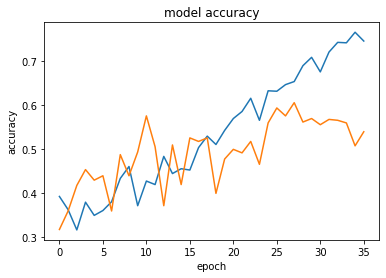

In [372]:
# train accuracy graph
plt.plot(history.history['accuracy'], label= 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

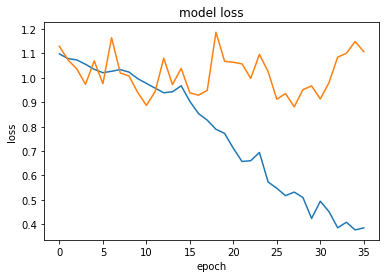

In [373]:
# train loss graph
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [374]:
# save trained model
model.save('/users/macbookpro/twitter-sentiment-fasttext-52.model')

INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


INFO:tensorflow:Assets written to: /users/macbookpro/twitter-sentiment-fasttext-52.model/assets


In [375]:
# load trained model
model = load_model('/users/macbookpro/twitter-sentiment-fasttext-52.model')

In [376]:
model.metrics_names


['loss', 'accuracy']

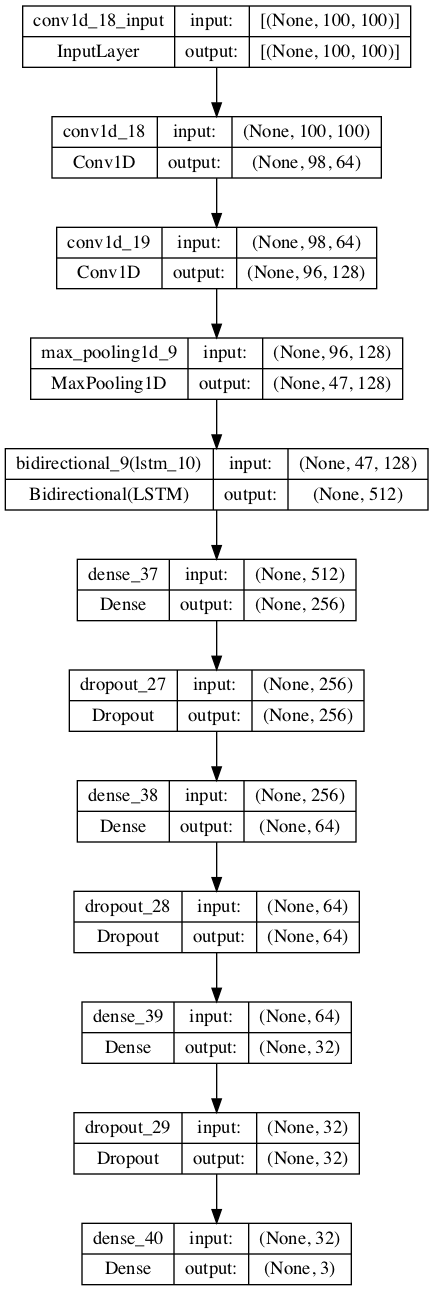

In [377]:
# printing model summary of the saved model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [378]:
# run model evaluations on test data
model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

16/16 [==============================] - 2s 54ms/step - loss: 1.1076 - accuracy: 0.5400


[1.1075648069381714, 0.5400000214576721]

In [379]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes=np.argmax(yhat_probs,axis=1)

In [380]:
# pre processing for inference
clas = []
for i in yhat_classes:
  clas.append(i-1)
clas=np.array(clas)
clas

array([ 0,  1,  0,  0,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,
        0,  1,  1, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,
        1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1, -1,  1,  0,  0,  0,  0,
        0,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1,
        1,  0, -1,  1, -1,  1,  1,  0,  0,  1,  0,  1,  1, -1,  1,  1,  0,
        0, -1,  0,  0,  0

In [381]:
# pre processing for inference
y_clas= np.array(df_test['sentiment'])
y_clas

array([ 0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0, -1,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,
        1,  1,  1,  1,  1, -1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,
        1,  1,  0,  0,  0,  0,  1, -1, -1,  1,  0,  1,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0, -1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [382]:
print('FastText+LSTM:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_clas, clas)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_clas, clas,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_clas, clas,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_clas, clas,average='weighted')
print('F1 score: %f' % f1)

FastText+LSTM:
Accuracy: 0.540000
Precision: 0.580672
Recall: 0.540000
F1 score: 0.555484


In [383]:
# build a confusion matrix
cm = confusion_matrix(y_clas, clas)
print(cm)

[[  1   5   9]
 [ 19 174 111]
 [ 13  73  95]]


In [384]:
# reference: https://leslietj.github.io/2020/06/22/Draw-Confusion-Matrix-for-CNN-models/
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')
 
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    print(len(target_names))
    plt.ylim(len(target_names)-0.5, -0.5)
    # plt.xlim(len(target_names)-0.5, 0)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.grid(None)
    # , bbox_inches = 'tight'
    plt.savefig(title + '.png', dpi=500)
    plt.show()

3


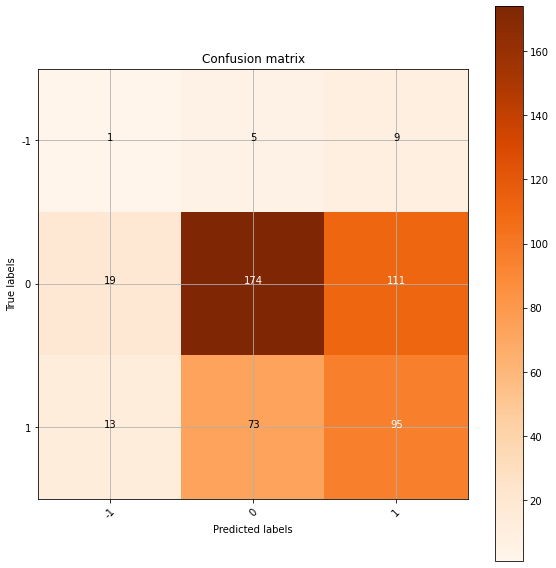

In [385]:
plot_confusion_matrix(cm, ['-1', '0', '1'])